# ORGANICS

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

In [35]:
data = pd.read_csv('/Users/giniatullinaalsuzamilevna/Desktop/Data/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv',encoding="cp1251")

data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


(22223, 13)

In [38]:
data.isnull().any().any()

True

In [39]:
data = data.fillna(data.mean())

In [40]:
x = data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y = data['TargetBuy']
y = y.astype('int')

print(x)
print(y)

       DemAffl  DemAge  DemCluster  PromSpend  PromTime
0         10.0    76.0        16.0   16000.00       4.0
1          4.0    49.0        35.0    6000.00       5.0
2          5.0    70.0        27.0       0.02       8.0
3         10.0    65.0        51.0       0.01       7.0
4         11.0    68.0         4.0       0.01       8.0
...        ...     ...         ...        ...       ...
22218     13.0    65.0         9.0    1500.00       5.0
22219     15.0    73.0        34.0    6053.06      12.0
22220      9.0    70.0        15.0    6000.00       5.0
22221     11.0    66.0         8.0    5000.00       5.0
22222      3.0    75.0        53.0    6000.00       2.0

[22223 rows x 5 columns]
0        0
1        0
2        1
3        1
4        0
        ..
22218    0
22219    0
22220    0
22221    0
22222    0
Name: TargetBuy, Length: 22223, dtype: int64


In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

tree = DecisionTreeClassifier(max_depth = 5, random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [42]:
from sklearn.tree import export_graphviz

import subprocess

export_graphviz(tree, out_file='/Users/giniatullinaalsuzamilevna/Desktop/Data/DATA-ANALYSYS_2-master/DZ/HW4/Organics_tree.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True)

import pydot 
(graph, ) = pydot.graph_from_dot_file('/Users/giniatullinaalsuzamilevna/Desktop/Data/DATA-ANALYSYS_2-master/DZ/HW4/Organics_tree.dot')

graph.write_png('/Users/giniatullinaalsuzamilevna/Desktop/Data/DATA-ANALYSYS_2-master/DZ/HW4/Organics_tree.png')

Метрики:

In [43]:
# Сonfusion matrix
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[4688  300]
 [1037  642]]


In [44]:
# Mean Consequential Error
print(accuracy_score(y_test, y_pred))

0.79946002699865


In [45]:
# Recall
print(recall_score(y_test, y_pred))

0.3823704586063133


In [46]:
# Presicion
print(precision_score(y_test, y_pred))

0.6815286624203821


In [47]:
# Cohen’s Kappa
print(cohen_kappa_score(y_test, y_pred))

0.37713667367504267


In [48]:
# F - value
print(f1_score(y_test, y_pred))

0.48988935520793586


In [49]:
# Balanced accuracy
print(balanced_accuracy_score(y_test, y_pred))

0.661113056087439


In [50]:
# Matthews correlation coefficient
print(matthews_corrcoef(y_test, y_pred))

0.40154674048619704


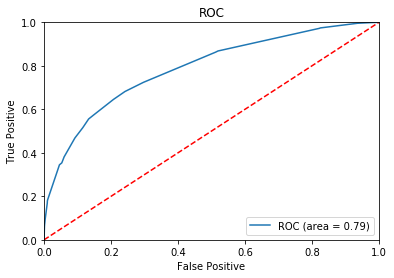

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
pred_prob = tree.predict_proba(X_test)
pred = pred_prob[:, -1]
fpr, tpr, threshold = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

plt.title('ROC')
plt.plot(fpr, tpr, label='ROC (area = %0.2f)' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.show()